 # Trabajo Práctico 2 

## Introducción

Los modelos se construyeron, en base al dataset resultado del **TP1(83.576 registros, 36 columnas)** seleccionando 3 barrios con cantidad similar de datos entre cada uno(**Palermo, Belgrano y Caballito**), se convirtieron en variables dummies los barrios seleccionados de la columna categórica place_name.
A partir de lo anterior se estimaron 4 tipos de modelo: Lineal, Ridge, Lasso y Elastic Net. Con el objetivo determinar las variables significativas que permiten estimar el precio de las propiedades por m2, además del calculo del 𝑅2 que nos informa que tanto es explicado el modelo por las variables predictoras.

## Objetivos

* Seleccionar los datos a modelar. Justificar esa selección.
* Entrenar al menos tres modelos de regresión lineal distintos sobre estos datos.
* Evaluar la performance de los modelos y comparar ventajas y desventajas de cada uno.
* Determinar la importancia de las features incluidas en la predicción. Interpretar.


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
%matplotlib inline

* Trabajamos a partir de la data resultante del TP anterior

In [2]:
data = pd.read_csv('Data\data_p2.csv')

In [3]:
data.shape

(83576, 34)

In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'operation', 'property_type',
       'place_name', 'place_with_parent_names', 'country_name', 'state_name',
       'price', 'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'tiene_parrilla',
       'tiene_solarium', 'tiene_cancha_tenis', 'tiene_campo_golf',
       'tiene_jacuzzi', 'tiene_ascensorvf', 'tiene_piscinavf',
       'tiene_garajevf', 'tiene_terrazavf', 'tiene_jardinvf',
       'tiene_gimnasiovf'],
      dtype='object')

In [5]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [6]:
data.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,...,tiene_solarium,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi,tiene_ascensorvf,tiene_piscinavf,tiene_garajevf,tiene_terrazavf,tiene_jardinvf,tiene_gimnasiovf
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,62000.0,USD,1093959.0,62000.0,...,False,False,False,False,False,False,False,False,False,False
1,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,72000.0,USD,1270404.0,72000.0,...,False,False,False,False,False,False,False,False,False,False
2,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,95000.0,USD,1676227.5,95000.0,...,False,False,False,False,False,False,False,False,False,False
3,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,64000.0,USD,1129248.0,64000.0,...,False,False,False,False,False,False,False,False,False,False
4,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,130000.0,USD,2293785.0,130000.0,...,False,False,False,False,False,False,False,False,False,False


* se selecciona 3 barrios con cantidad similar de datos entre cada uno(**Palermo, Belgrano y Caballito**)

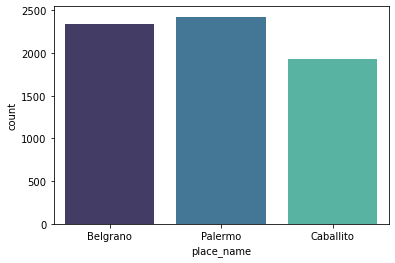

In [134]:
ax = sns.countplot(x='place_name', data = data_2, palette="mako")

In [7]:
barrios = ['Palermo', 'Belgrano', 'Caballito']
mask=[]
for barrio in barrios:
    mask_barrio = data.place_name == barrio
    mask.append(mask_barrio)

In [8]:
mask_1 = np.logical_or(mask[0], mask[1])

In [9]:
mask_2 = np.logical_or(mask_1, mask[2])

In [10]:
data.loc[mask_2]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,...,tiene_solarium,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi,tiene_ascensorvf,tiene_piscinavf,tiene_garajevf,tiene_terrazavf,tiene_jardinvf,tiene_gimnasiovf
5,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,138000.0,USD,2434941.00,138000.0,...,True,False,False,False,False,True,False,False,False,False
6,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,195000.0,USD,3440677.50,195000.0,...,True,False,False,False,False,True,False,False,False,False
14,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,350000.0,USD,6175575.00,350000.0,...,False,False,False,False,False,False,False,True,False,False
15,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,270500.0,USD,4772837.25,270500.0,...,False,False,False,False,False,False,False,False,False,False
44,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,110000.0,USD,1940895.00,110000.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83563,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,74500.0,USD,1314515.25,74500.0,...,False,False,False,False,False,False,False,True,False,False
83568,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,128000.0,USD,2258496.00,128000.0,...,False,False,False,False,False,True,True,True,False,True
83570,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,410000.0,USD,7234245.00,410000.0,...,False,False,False,False,True,False,False,True,False,False
83571,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,410000.0,USD,7234245.00,410000.0,...,False,False,False,False,True,False,False,True,False,False


In [11]:
data_set1_cc = data.loc[mask_2]

In [12]:
data_set1_cc = data_set1_cc.reset_index()

In [13]:
data_set1_cc = data_set1_cc.drop(['index'], axis=1)

In [14]:
data_set1_cc.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,...,tiene_solarium,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi,tiene_ascensorvf,tiene_piscinavf,tiene_garajevf,tiene_terrazavf,tiene_jardinvf,tiene_gimnasiovf
0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,138000.0,USD,2434941.00,138000.0,...,True,False,False,False,False,True,False,False,False,False
1,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,195000.0,USD,3440677.50,195000.0,...,True,False,False,False,False,True,False,False,False,False
2,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,350000.0,USD,6175575.00,350000.0,...,False,False,False,False,False,False,False,True,False,False
3,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,270500.0,USD,4772837.25,270500.0,...,False,False,False,False,False,False,False,False,False,False
4,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,110000.0,USD,1940895.00,110000.0,...,False,False,False,False,False,False,False,True,False,False


## 1. Se convierte la variable categórica property_type a variable dummy

In [15]:

dummies_property_type = pd.get_dummies(data_set1_cc['property_type'], drop_first = True, prefix = 'type')

In [16]:
data_2 = pd.concat([data_set1_cc, dummies_property_type], axis = 1)

In [17]:
data_2.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,...,tiene_jacuzzi,tiene_ascensorvf,tiene_piscinavf,tiene_garajevf,tiene_terrazavf,tiene_jardinvf,tiene_gimnasiovf,type_apartment,type_house,type_store
0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,138000.0,USD,2434941.00,138000.0,...,False,False,True,False,False,False,False,1,0,0
1,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,195000.0,USD,3440677.50,195000.0,...,False,False,True,False,False,False,False,1,0,0
2,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,350000.0,USD,6175575.00,350000.0,...,False,False,False,False,True,False,False,1,0,0
3,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,270500.0,USD,4772837.25,270500.0,...,False,False,False,False,False,False,False,1,0,0
4,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,110000.0,USD,1940895.00,110000.0,...,False,False,False,False,True,False,False,1,0,0


* La variable categórica **place name** tambien se convierte  a dummies

In [19]:
dummies_place_name = pd.get_dummies(data_2['place_name'], drop_first = True, prefix = 'place')

In [20]:
data_2 = pd.concat([data_2, dummies_place_name], axis = 1)

* La variable **floor** tambien se convierte a variable dicotomica.

In [21]:

data_2.floor.value_counts()

0.0    4738
1.0     625
2.0     354
8.0     178
3.0     171
9.0     137
7.0     136
4.0     129
6.0     123
5.0     105
Name: floor, dtype: int64

In [22]:
dummies_floor = pd.get_dummies(data_2['floor'], drop_first = True, prefix = 'floor')

In [23]:
data_2 = pd.concat([data_2, dummies_floor], axis = 1)

In [24]:
data_2.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,...,place_Palermo,floor_1.0,floor_2.0,floor_3.0,floor_4.0,floor_5.0,floor_6.0,floor_7.0,floor_8.0,floor_9.0
0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,138000.0,USD,2434941.00,138000.0,...,0,0,0,0,0,0,0,0,0,0
1,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,195000.0,USD,3440677.50,195000.0,...,0,0,0,0,0,0,0,0,0,0
2,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,350000.0,USD,6175575.00,350000.0,...,1,0,0,0,0,0,0,0,0,0
3,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,270500.0,USD,4772837.25,270500.0,...,1,0,0,0,0,0,0,0,0,0
4,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,110000.0,USD,1940895.00,110000.0,...,0,0,0,0,0,0,0,0,0,0


**El resultado es un data frame con mas de 6 mil datos en 46 columnas**

In [25]:
data_2.shape

(6696, 46)

In [26]:
data_2.isnull().any()

operation                     False
property_type                 False
place_name                    False
place_with_parent_names       False
country_name                  False
state_name                    False
price                         False
currency                      False
price_aprox_local_currency    False
price_aprox_usd               False
surface_total_in_m2           False
surface_covered_in_m2         False
price_usd_per_m2              False
price_per_m2                  False
floor                         False
rooms                         False
expenses                      False
properati_url                 False
description                   False
title                         False
image_thumbnail               False
tiene_parrilla                False
tiene_solarium                False
tiene_cancha_tenis            False
tiene_campo_golf              False
tiene_jacuzzi                 False
tiene_ascensorvf              False
tiene_piscinavf             

In [27]:
#Aqui vamos a pasar estas variables a dummies ya que estaban como booleanas
cambiar_a_dummies = ['tiene_ascensorvf','tiene_garajevf', 'tiene_terrazavf', 'tiene_piscinavf', 'tiene_solarium', 'tiene_parrilla',
         'tiene_jardinvf', 'tiene_gimnasiovf', 'tiene_cancha_tenis', 'tiene_campo_golf', 'tiene_jacuzzi' ]


for i in cambiar_a_dummies:
    data_2[i] = data_2[i].astype(str)

In [28]:
concat_dummies = pd.DataFrame()
for serie in cambiar_a_dummies:
    columna = pd.get_dummies(data_2[serie], drop_first=True, prefix=serie).squeeze()
    concat_dummies[serie] = columna


In [29]:
concat_dummies

,tiene_ascensorvf,tiene_garajevf,tiene_terrazavf,tiene_piscinavf,tiene_solarium,tiene_parrilla,tiene_jardinvf,tiene_gimnasiovf,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi
0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6691,0,0,1,0,0,0,0,0,0,0,0
6692,0,1,1,1,0,1,0,1,0,0,0
6693,1,0,1,0,0,0,0,0,0,0,0
6694,1,0,1,0,0,0,0,0,0,0,0


In [71]:
data_2 = data_2.drop(cambiar_a_dummies, axis=1)

KeyError: "['tiene_ascensorvf' 'tiene_garajevf' 'tiene_terrazavf' 'tiene_piscinavf'\n 'tiene_solarium' 'tiene_parrilla' 'tiene_jardinvf' 'tiene_gimnasiovf'\n 'tiene_cancha_tenis' 'tiene_campo_golf' 'tiene_jacuzzi'] not found in axis"

In [72]:
data_2 = pd.concat([data_2, concat_dummies], axis = 1)

In [73]:
data_2.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,...,tiene_garajevf,tiene_terrazavf,tiene_piscinavf,tiene_solarium,tiene_parrilla,tiene_jardinvf,tiene_gimnasiovf,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi
0,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,138000.0,USD,2434941.00,138000.0,...,0,0,1,1,0,0,0,0,0,0
1,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,195000.0,USD,3440677.50,195000.0,...,0,0,1,1,0,0,0,0,0,0
2,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,350000.0,USD,6175575.00,350000.0,...,0,1,0,0,0,0,0,0,0,0
3,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,270500.0,USD,4772837.25,270500.0,...,0,0,0,0,0,0,0,0,0,0
4,sell,apartment,Caballito,|Argentina|Capital Federal|Caballito|,Argentina,Capital Federal,110000.0,USD,1940895.00,110000.0,...,0,1,0,0,0,0,0,0,0,0


## 2. Regresión Lineal

Se visualiza el precio contra superficie en una grafica para analizar modelos de regresion lineal

(0.0, 2000000.0)

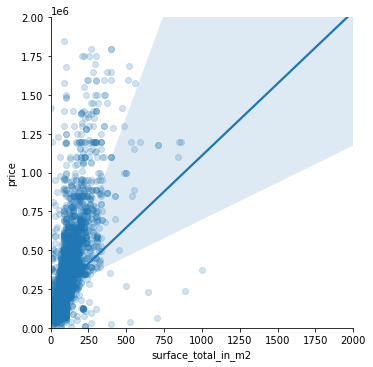

In [32]:
sns.lmplot(x='surface_total_in_m2', y='price', data=data_2, aspect=1,scatter_kws={'alpha':0.2});
plt.xlim([0,2000]) and plt.ylim([0,2000000])

* Se eligen las features predictoras, se toman todas variables categoricas menos **superficie total**, **superficie cubierta**, y **expenses**

In [74]:
x = data_2.drop(['price', 'currency','price_usd_per_m2', 'price_per_m2', 'operation', 'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'floor','properati_url', 'description', 'title',
       'image_thumbnail'], axis=1)

* Se observa la correlacion entre nuestras variables predictoras

In [75]:
x.corr()

,surface_total_in_m2,surface_covered_in_m2,rooms,expenses,type_apartment,type_house,type_store,place_Caballito,place_Palermo,floor_1.0,...,tiene_garajevf,tiene_terrazavf,tiene_piscinavf,tiene_solarium,tiene_parrilla,tiene_jardinvf,tiene_gimnasiovf,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi
surface_total_in_m2,1.000000,0.432091,0.361666,0.327278,-0.159128,0.128319,0.107731,-0.108573,0.089661,-0.029421,...,0.112097,0.012444,-0.013033,-0.069926,0.022330,0.070094,0.016132,0.008432,0.010345,0.014822
surface_covered_in_m2,0.432091,1.000000,0.790416,0.638709,-0.234763,0.327875,0.063981,-0.159386,0.100881,-0.028602,...,0.253180,0.075257,-0.037456,-0.124855,0.013374,0.169765,0.026530,0.022907,0.012900,0.032476
rooms,0.361666,0.790416,1.000000,0.584953,-0.229924,0.247437,0.035298,-0.109566,0.093964,-0.035990,...,0.213526,0.079783,-0.105905,-0.176942,-0.053014,0.134844,-0.004605,0.026915,0.010171,-0.032350
expenses,0.327278,0.638709,0.584953,1.000000,0.057240,-0.154291,0.027927,-0.294717,0.135266,-0.011535,...,0.265006,0.083159,-0.000222,-0.095055,-0.022960,0.066470,0.074905,0.057353,0.042223,0.013166
type_apartment,-0.159128,-0.234763,-0.229924,0.057240,1.000000,-0.514554,-0.538780,0.036475,-0.082639,0.051141,...,0.097941,0.087545,0.131062,0.123253,0.014086,-0.072032,0.095032,0.025890,0.023918,0.025468
type_house,0.128319,0.327875,0.247437,-0.154291,-0.514554,1.000000,-0.022034,-0.010946,0.019733,-0.046544,...,0.051180,0.009214,-0.030832,-0.055971,0.050761,0.161430,-0.036823,-0.013322,-0.017309,0.016905
type_store,0.107731,0.063981,0.035298,0.027927,-0.538780,-0.022034,1.000000,-0.054336,0.067631,-0.041820,...,-0.106577,-0.160186,-0.084154,-0.067569,-0.071176,-0.024023,-0.049185,-0.013949,-0.001024,-0.029250
place_Caballito,-0.108573,-0.159386,-0.109566,-0.294717,0.036475,-0.010946,-0.054336,1.000000,-0.478981,0.000153,...,0.001323,-0.009265,-0.063854,0.063139,0.054376,-0.057089,-0.121161,0.010447,-0.075850,0.046765
place_Palermo,0.089661,0.100881,0.093964,0.135266,-0.082639,0.019733,0.067631,-0.478981,1.000000,0.007105,...,-0.036405,-0.021017,-0.004268,-0.044139,-0.035951,0.044433,0.039134,0.019514,-0.047654,0.016735
floor_1.0,-0.029421,-0.028602,-0.035990,-0.011535,0.051141,-0.046544,-0.041820,0.000153,0.007105,1.000000,...,0.064066,0.026608,0.115681,0.148158,0.024330,0.010808,0.104636,-0.023829,0.005350,-0.035610


* Se puede evidenciar que no hay demasiado correlación entre las variables, por lo que se cree que no 
  caeria en problemas de colinealidad excepto en **cantidad de cuartos** y **superficie en m2** al igual que con **expensas**

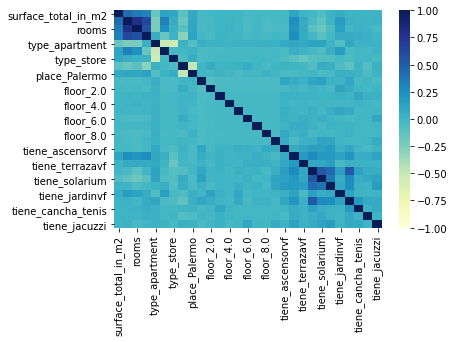

In [76]:
sns.heatmap(x.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [38]:
features = ['type_apartment', 'type_house', 'type_store', 'surface_total_in_m2','surface_covered_in_m2', 'tiene_ascensorvf','tiene_garajevf', 'tiene_terrazavf', 'tiene_piscinavf', 'floor', 'rooms', 'tiene_solarium', 'tiene_parrilla','tiene_jardinvf', 'tiene_gimnasiovf', 'tiene_cancha_tenis', 'expenses', 'tiene_campo_golf', 'tiene_jacuzzi','place_Caballito', 'place_Palermo', 'floor_1.0','floor_2.0', 'floor_3.0', 'floor_4.0', 'floor_5.0', 'floor_6.0','floor_7.0', 'floor_8.0']

In [39]:
numerical_variables = ['surface_covered_in_m2', 'surface_total_in_m2', 'expenses', 'rooms']
categorical_variables_short = ['type_apartment', 'type_house', 'type_store','place_Caballito', 'place_Palermo']

In [40]:
y = data_2['price']

* Se visualiza la grafica de relacion de las variables explicativas numericas
  contra precio para cada barrio y cada tipo de propiedad.

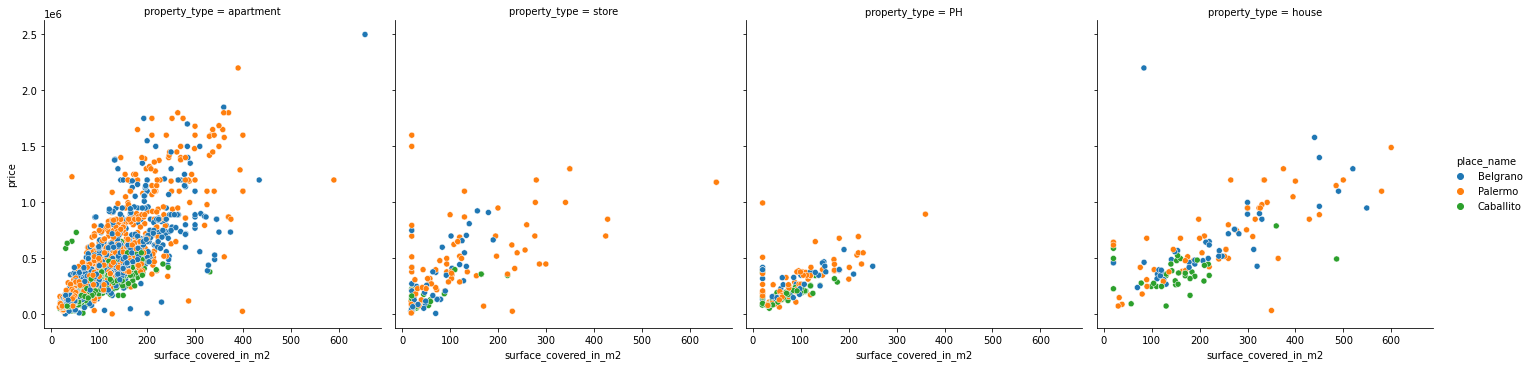

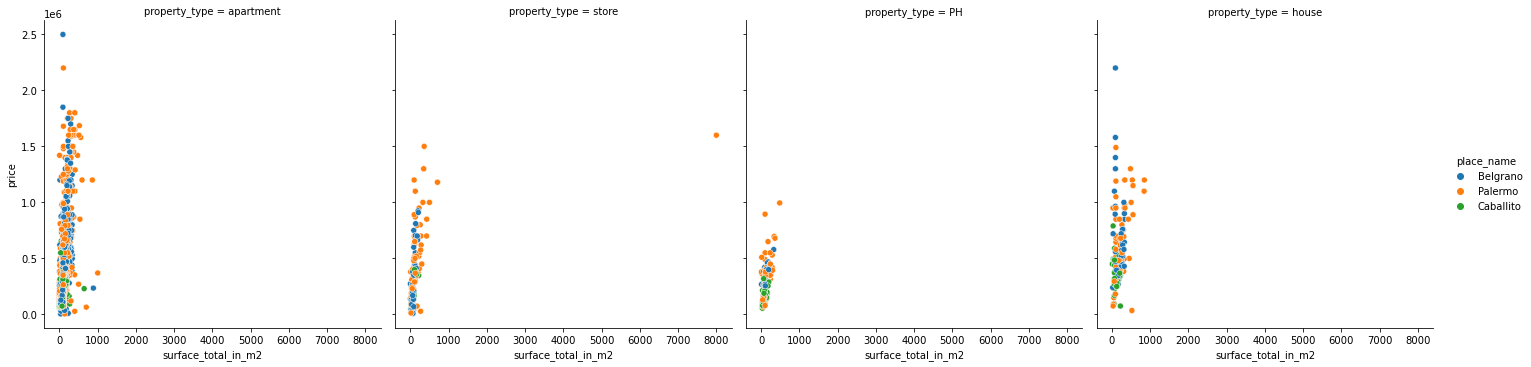

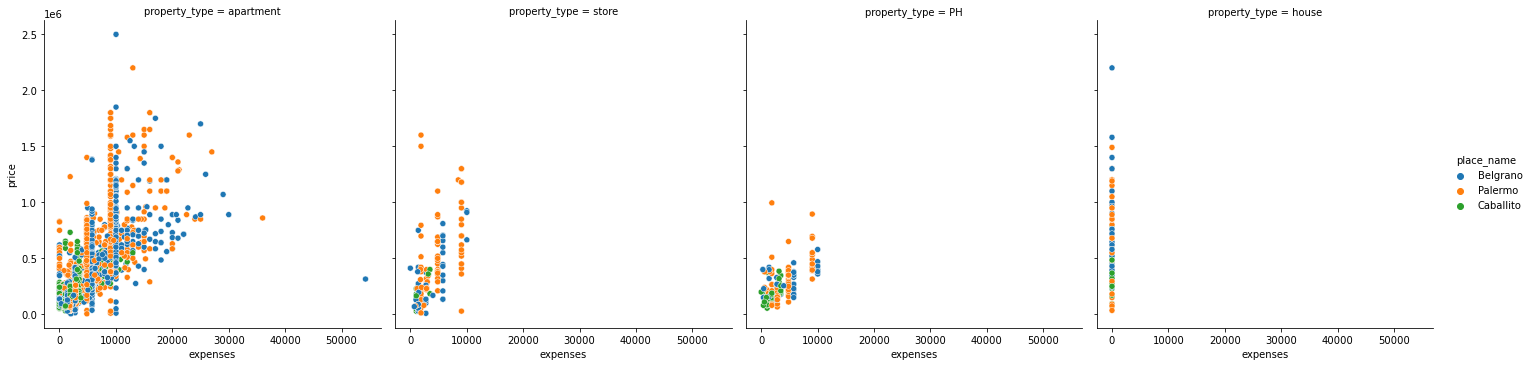

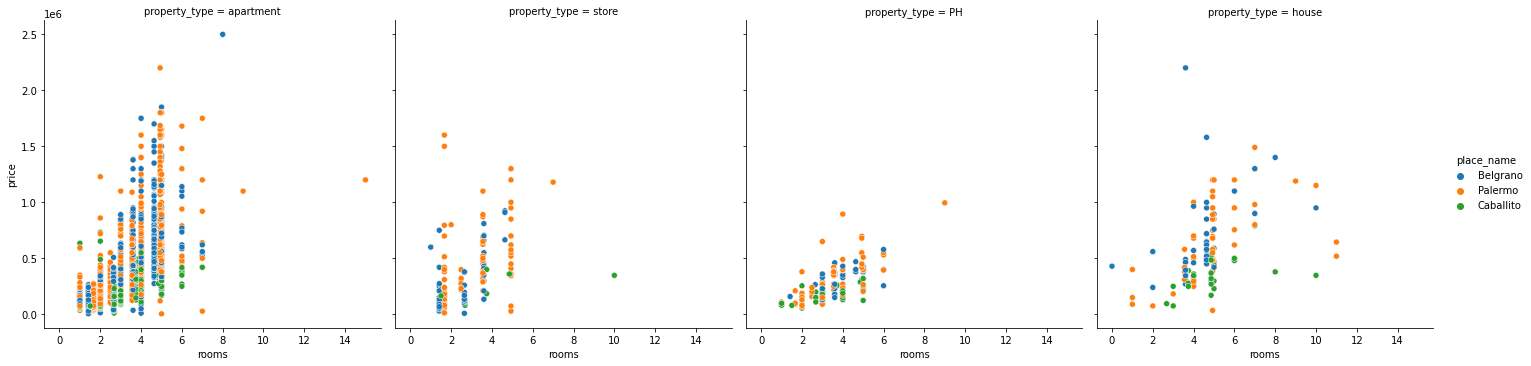

In [77]:

for i in numerical_variables:
    sns.relplot(data=data_2, x=i, y='price', hue="place_name", col="property_type", )


* Se muestra la grafica de regresión con logistic=true para algunas variables categoricas. Lo que muestra la linea de regresión es la probabilidad estimada de que y = 1 para un determinado
  valor de x precio.

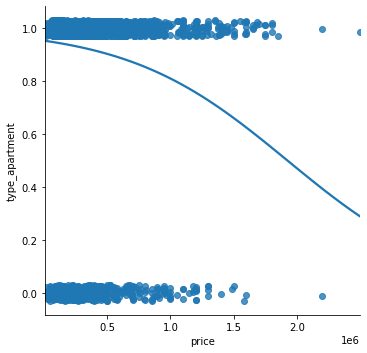

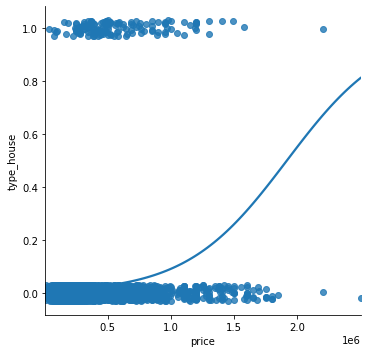

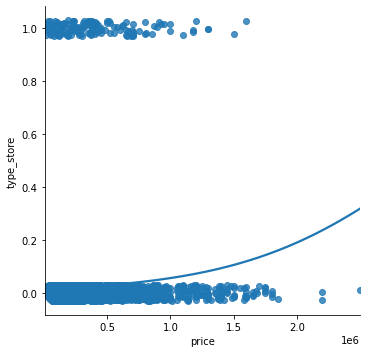

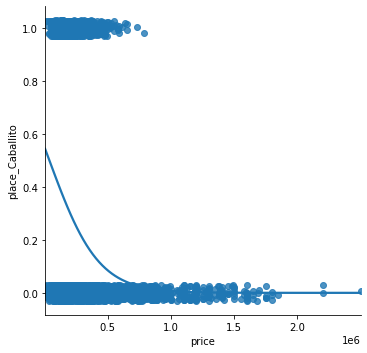

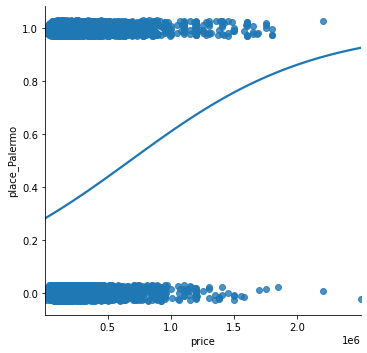

In [42]:
for i in categorical_variables_short:
    sns.lmplot(x='price', y=i, data=data_2,
    logistic=True, y_jitter=.03, ci=None);

* Se define el modelo de Regresion Lineal

In [78]:
linreg = LinearRegression()

* Se divide el dataset en los datos de entrenamiento y los datos de testeo, se elige tomar
  un 30% de data para test.

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

* Se realiza el fit del modelo, donde el modelo aprende de los datos para realizar la regresión.

In [80]:
modelo_1 = linreg.fit(x_train, y_train)

* Se encuentran las predicciones para **y** desde nuestro set de testeo de **x**

In [81]:
y_pred = modelo_1.predict(x_test)

* Los coeficientes para cada variable predictora. La tasa de variacion del precio en relacion
  al aumento en las variables que se eligieron para predecirlo o en el caso de las variables   categoricas si es verdadero.

In [82]:
list(zip(features, modelo_1.coef_))

[('type_apartment', 191.67461605403668),
 ('type_house', 2167.4233128763303),
 ('type_store', 10121.736768351693),
 ('surface_total_in_m2', 16.165682947014375),
 ('surface_covered_in_m2', 21574.292311957717),
 ('tiene_ascensorvf', 64975.701028578165),
 ('tiene_garajevf', 77970.16256709758),
 ('tiene_terrazavf', -23156.46499711189),
 ('tiene_piscinavf', 18818.124850074626),
 ('floor', -13713.97333489912),
 ('rooms', -6263.109103196246),
 ('tiene_solarium', -25643.981886301244),
 ('tiene_parrilla', -22098.349022876722),
 ('tiene_jardinvf', 26619.157310775143),
 ('tiene_gimnasiovf', -20140.45361555224),
 ('tiene_cancha_tenis', -20799.48799088703),
 ('expenses', -15597.53868495782),
 ('tiene_campo_golf', -24880.460843982917),
 ('tiene_jacuzzi', -479.91793794231603),
 ('place_Caballito', 24807.001711025303),
 ('place_Palermo', -13029.279866214616),
 ('floor_1.0', 43972.32771593247),
 ('floor_2.0', -11604.897901878705),
 ('floor_3.0', 841.588719810878),
 ('floor_4.0', 20495.536216078115),
 (

* El intercepto u ordenada al origen del modelo.

In [83]:
modelo_1.intercept_

-48022.417888261145

* Se puede ver como funciona el modelo con los datos de entrenamiento

In [84]:
modelo_1.score(x_train, y_train)

0.7547704741063987

* El error medio cuadratico.

In [85]:
test_set_rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
test_set_rmse

115912.855519733

* Finalmente comparando los datos predichos con los que se habian reservado para testeo,
  se ontiene un **R2 score** que dice que este modelo logra explicar un **74%** de la varianza
  total de **Y**.

In [86]:
metrics.r2_score(y_test, y_pred)

0.748090673597144

* Se ven los datos reales contra los datos predichos.

<AxesSubplot:xlabel='price'>

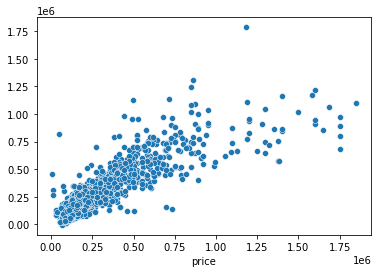

In [87]:
sns.scatterplot(x=y_test, y=y_pred)

* Se realiza el mismo modelo con Stats Model para lograr obtener el summary.

In [88]:
import statsmodels.api as sm


X_1 = x
y = data_2.price

X_1 = sm.add_constant(X_1)

model = sm.OLS(y, X_1).fit()

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     702.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:39:44   Log-Likelihood:                -87769.
No. Observations:                6696   AIC:                         1.756e+05
Df Residuals:                    6666   BIC:                         1.758e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.647e+04   1.01e+04     -5.569      0.000   -7.63e+04   -3.66e+04
surface_total_in_m2     206.6277     13.893     14.872      0.000     179.392     233.863
surface_covered_in_m2  2154.9163     46.787     46.058      0.000    2063.200    2246.633
rooms                   1.02e+04   2035.090      5.012      0.000    6211.431    1.42e+04
expenses                 16.3612      0.752     21.767      0.000      14.888      17.835
type_apartment         2.977e+04   8746.817      3.404      0.001    1.26e+04    4.69e+04
type_house             6.189e+04   1.51e+04      4.101      0.000    3.23e+04    9.15e+04
type_store              7.99e+04   1.31e+04      6.110      0.000    5.43e+04    1.06e+05
place_Caballito       -2.307e+04   3966.516     -5.816      0.000   -3.08e+04   -1.53e+04
place_Palermo          2.004e+04   3512.286      5.705      0.000    1.32e+04    2.69e+04
floor_1.0             -1.955e+04   5230.320     -3.737      0.000   -2.98e+04   -9292.902
floor_2.0             -9957.1494   6711.720     -1.484      0.138   -2.31e+04    3199.969
floor_3.0             -3.385e+04   9391.087     -3.605      0.000   -5.23e+04   -1.54e+04
floor_4.0             -2.325e+04   1.07e+04     -2.175      0.030   -4.42e+04   -2293.598
floor_5.0              3.645e+04    1.2e+04      3.049      0.002     1.3e+04    5.99e+04
floor_6.0             -2.783e+04   1.11e+04     -2.516      0.012   -4.95e+04   -6143.193
floor_7.0             -2.778e+04   1.05e+04     -2.654      0.008   -4.83e+04   -7257.626
floor_8.0              -1.69e+04   9252.781     -1.826      0.068    -3.5e+04    1239.179
floor_9.0             -2.269e+04   1.06e+04     -2.149      0.032   -4.34e+04   -1989.079
tiene_ascensorvf       1371.5789   4386.780      0.313      0.755   -7227.914    9971.072
tiene_garajevf         2.416e+04   3372.096      7.164      0.000    1.75e+04    3.08e+04
tiene_terrazavf       -1.193e+04   3174.101     -3.757      0.000   -1.81e+04   -5704.373
tiene_piscinavf        4.501e+04   4538.084      9.918      0.000    3.61e+04    5.39e+04
tiene_solarium        -1.437e+04   4680.379     -3.070      0.002   -2.35e+04   -5192.775
tiene_parrilla         1050.5749   3828.983      0.274      0.784   -6455.456    8556.606
tiene_jardinvf         2.449e+04   5588.074      4.382      0.000    1.35e+04    3.54e+04
tiene_gimnasiovf       4.184e+04   5027.529      8.322      0.000     3.2e+04    5.17e+04
tiene_cancha_tenis      9.11e+04   1.65e+04      5.506      0.000    5.87e+04    1.24e+05
tiene_campo_golf        9.15e+04   1.26e+04      7.243      0.000    6.67e+04    1.16e+05
tiene_jacuzzi          2.347e+04   7133.859      3.289      0.001    9481.710    3.75e+04
==============================================================================
Omnibus:                     4099.

* Si se pone un umbral de **5%** para el p valor, podemos decir que las variables tiene_ascensorvf y tiene_parrilla no son significativas dentro del modelo, debido a que su P-value no es cercano a 0. Tambien nos da un aviso de posible multicolinealidad, algo que se va a comparar luego con el modelo de Lasso y como trata con los coeficientes de las variables que posiblemente tengan correlacion entre ellas.

* A modo de experimento se va a visualizar una regresion lineal simple utilizando como 
  varliable explicativa la superficie.

In [105]:
X_2 = data_2['surface_total_in_m2']

X_2 = sm.add_constant(X_2)

model_2 = sm.OLS(y, X_2).fit()

In [106]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1749.
Date:                Tue, 13 Sep 2022   Prob (F-statistic):               0.00
Time:                        09:41:22   Log-Likelihood:                -91679.
No. Observations:                6696   AIC:                         1.834e+05
Df Residuals:                    6694   BIC:                         1.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.821e+05   3277.370     55.557      0.000    1.76e+05    1.89e+05
surface_total_in_m2   928.1573     22.196     41.816      0.000     884.645     971.670
==============================================================================
Omnibus:                     3101.461   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3026587.909
Skew:                          -0.695   Prob(JB):                         0.00
Kurtosis:                     107.144   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Se puede ver que la variable superficie por si sola
   no explica bien la variabilidad en **Y**, ya que arroja un **R2** muy bajo

## 2. Regresión de Ridge

Primero vamos a seleccionar el mejor valor de alpha para aplicar la regularización de Ridge. Lo hacemos a través de cross validation con 5 folds.

In [107]:
cv = KFold(5, shuffle=True, random_state=12)

In [93]:
reg_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10], normalize=True, cv=cv)

In [94]:
model_3 = reg_ridge.fit(x_train, y_train)

In [95]:
model_3.alpha_

1e-05

In [96]:
model_3.intercept_

-48023.09649750864

In [97]:
dict(zip(features, model_3.coef_))

{'type_apartment': 191.67634128603007,
 'type_house': 2167.3587979807457,
 'type_store': 10123.651456032487,
 'surface_total_in_m2': 16.165882047597634,
 'surface_covered_in_m2': 21573.78146296843,
 'tiene_ascensorvf': 64980.1887702754,
 'tiene_garajevf': 77970.11328084616,
 'tiene_terrazavf': -23156.8302086556,
 'tiene_piscinavf': 18817.933548766592,
 'floor': -13713.792495107275,
 'rooms': -6263.076141615455,
 'tiene_solarium': -25643.417352421377,
 'tiene_parrilla': -22098.23861918944,
 'tiene_jardinvf': 26618.747746031426,
 'tiene_gimnasiovf': -20140.50711130742,
 'tiene_cancha_tenis': -20799.395229381913,
 'expenses': -15597.557952407387,
 'tiene_campo_golf': -24880.005880303557,
 'tiene_jacuzzi': -479.86257599369634,
 'place_Caballito': 24807.371319466827,
 'place_Palermo': -13029.157507826607,
 'floor_1.0': 43971.81838737749,
 'floor_2.0': -11604.641167713398,
 'floor_3.0': 841.9166588407198,
 'floor_4.0': 20496.074242677503,
 'floor_5.0': 43019.942572929554,
 'floor_6.0': 11392

* Se creara un dataframe para poder comparar como se modificaron los coeficientes.

*  no se grafica, porque son muchas variables y porque algunos cambios no se
   distinguirian bien en una grafica.

In [98]:
dict_model_3_coef = dict(zip(features, model_3.coef_))
dict_model_3_coef
coef_model_ridge = pd.DataFrame.from_dict(dict_model_3_coef, orient='index', columns=['coef'])
coef_model_ridge['features'] = coef_model_ridge.index
coef_model_ridge = coef_model_ridge.reset_index()
coef_model_ridge.drop('index',axis=1, inplace=True)

dict_model_1_coef = dict(zip(features, modelo_1.coef_))

coef_model_1 = pd.DataFrame.from_dict(dict_model_1_coef, orient='index', columns=['coef'])
coef_model_1['features'] = coef_model_1.index
coef_model_1 = coef_model_1.reset_index()
coef_model_1.drop('index',axis=1, inplace=True)
data_comparacion_coef = coef_model_1.merge(coef_model_ridge, on='features', suffixes=['model_1', 'model_ridge'])
data_comparacion_coef

,coefmodel_1,features,coefmodel_ridge
0,191.674616,type_apartment,191.676341
1,2167.423313,type_house,2167.358798
2,10121.736768,type_store,10123.651456
3,16.165683,surface_total_in_m2,16.165882
4,21574.292312,surface_covered_in_m2,21573.781463
5,64975.701029,tiene_ascensorvf,64980.188770
6,77970.162567,tiene_garajevf,77970.113281
7,-23156.464997,tiene_terrazavf,-23156.830209
8,18818.124850,tiene_piscinavf,18817.933549
9,-13713.973335,floor,-13713.792495


* Se puede ver que la diferencia entre los coeficientes es minima.

In [99]:
model_3.score(x_test, y_test)

0.7480906729049293

In [100]:
y_predict_model_3 = model_3.predict(x_test)

In [101]:
metrics.r2_score(y_test, y_predict_model_3)

0.7480906729049293

* Se visualizan los resultados en un scatterplot.

<AxesSubplot:xlabel='price'>

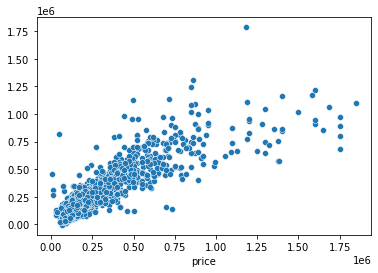

In [102]:
sns.scatterplot(x=y_test, y=y_predict_model_3)

* Ahora se hará el mismo modelo pero estandarizando las variables 
  numericas explicativas con Standard Scaler en vez de normalize.

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_variables = data_2[['surface_covered_in_m2', 'surface_total_in_m2', 'expenses', 'rooms']]
categorical_variables = x.drop(numerical_variables, axis=1)

X_std_numerical = scaler.fit_transform(numerical_variables)
X_std_numerical_df = pd.DataFrame(X_std_numerical)
X_std_numerical_df.columns = [i + '_std' for i in numerical_variables]
X_std_final = pd.concat([categorical_variables, X_std_numerical_df], axis=1)

#X_std_final.shape

print(numerical_variables.shape)
print(categorical_variables.shape)
print(X_std_numerical_df.shape)
X_std_final.isnull().any()

(6696, 4)
(6696, 25)
(6696, 4)


,type_apartment,type_house,type_store,place_Caballito,place_Palermo,floor_1.0,floor_2.0,floor_3.0,floor_4.0,floor_5.0,...,tiene_parrilla,tiene_jardinvf,tiene_gimnasiovf,tiene_cancha_tenis,tiene_campo_golf,tiene_jacuzzi,surface_covered_in_m2_std,surface_total_in_m2_std,expenses_std,rooms_std
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.619508,-0.374999,-0.617352,-1.035280
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.295412,-0.205088,-0.188592,-0.039147
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.287962,0.126240,0.473887,0.245615
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.084749,0.245178,-0.156193,1.055668
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.457460,-0.332521,-0.466043,0.245615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,-0.732942,-0.186666,-0.729094,-0.966340
6692,1,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,-0.700532,-0.434468,-0.617352,-1.035280
6693,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1.160922,0.576505,0.934593,1.571156
6694,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1.160922,0.576505,0.934593,1.571156


In [109]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_std_final, y, test_size = 0.3, random_state = 10)

In [110]:
cv_1 = KFold(n_splits=5, random_state=1, shuffle=True)

In [133]:
model_ridge_cv = linear_model.RidgeCV(alphas=np.linspace(0.1,100, 1000), cv=cv_1, normalize=False,scoring='r2')

model_fit_ridge_cv = model_ridge_cv.fit(X_train_2, y_train_2)


print(model_fit_ridge_cv.alpha_)
print(model_fit_ridge_cv.best_score_)

4.3999999999999995
0.7439139491649266


* Ahora se usará ese **alpha** en el modelo con los datos de testeo.

In [112]:
best_alpha = model_fit_ridge_cv.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, normalize = False)
model_fit_ridge = model_ridge.fit(X_train_2, y_train_2)

model_fit_ridge.coef_
print(model_fit_ridge.intercept_)

224754.6013007354


* Se evalua el modelo con los datos de entrenamiento.

print(model_fit_ridge.score(X_train_2, y_train_2))

* Finalmente se ve el score que se obtiene con los datos de testeo, muy similar al anterior
  lo que permite concluir que este modelo no genera overfitting.

In [114]:
print(model_fit_ridge.score(X_test_2, y_test_2))

0.7483303719559802


* Se pueden ver los coeficientes.

In [115]:
model_fit_ridge.coef_

array([ 17127.26825189,  57361.34673025,  70689.16879041, -23371.52163274,
        18556.27086909, -13683.23444904,  -6287.37266185, -24093.46219268,
       -21124.16553553,  24999.92924322, -18955.03843417, -19893.24367001,
       -15050.55281032, -23568.85753716,   -629.74379425,  24979.96475285,
       -13154.38633705,  44045.29056633, -11370.98242899,    713.90052493,
        20430.90642219,  43416.14382903, 100346.74676235,  95262.87073062,
        17528.06501428, 133835.41498166,  22628.1374748 ,  50812.73229603,
        12568.5397886 ])

## 3. Regresión con Lasso

Comenzamos buscando el mejor valor de alpha para nuestro modelo, nuevamente lo hacemos a través de cross validation

In [116]:
cv_2 = KFold(n_splits=5, shuffle=True)

In [117]:
reg_lasso = linear_model.LassoCV(alphas=np.linspace(0.1,100, 1000), normalize=True, cv=cv_2, random_state=12)

In [118]:
model_4 = reg_lasso.fit(x_train, y_train)

In [119]:
model_4.alpha_

4.0

In [120]:
model_4.intercept_

-42083.21646121045

* Se va a crear un dataframe para poder comparar como se modificaron los coeficientes del primer modelo sin regularizacion a este.
  no se grafica porque son muchas variables y porque algunos cambios no se
  distinguirian bien en una grafica.

In [121]:
dict_model_4_coef = dict(zip(features, model_4.coef_))

coef_model_lasso = pd.DataFrame.from_dict(dict_model_4_coef, orient='index', columns=['coef'])
coef_model_lasso['features'] = coef_model_lasso.index
coef_model_lasso = coef_model_lasso.reset_index()
coef_model_lasso.drop('index',axis=1, inplace=True)


dict_model_1_coef

coef_model_1 = pd.DataFrame.from_dict(dict_model_1_coef, orient='index', columns=['coef'])
coef_model_1['features'] = coef_model_1.index
coef_model_1 = coef_model_1.reset_index()
coef_model_1.drop('index',axis=1, inplace=True)
data_comparacion_coef_lasso = coef_model_1.merge(coef_model_lasso, on='features', suffixes=['model_1', 'model_lasso'])
data_comparacion_coef_lasso


,coefmodel_1,features,coefmodel_lasso
0,191.674616,type_apartment,190.697468
1,2167.423313,type_house,2174.077995
2,10121.736768,type_store,9782.545015
3,16.165683,surface_total_in_m2,16.132800
4,21574.292312,surface_covered_in_m2,15927.903007
5,64975.701029,tiene_ascensorvf,58472.075928
6,77970.162567,tiene_garajevf,71241.937653
7,-23156.464997,tiene_terrazavf,-23127.424183
8,18818.124850,tiene_piscinavf,18268.736205
9,-13713.973335,floor,-12580.156027


* Se ve que con este tipo de regularizacion los coeficientes se redujeron bastante
  las variables **tiene jacuzzi** y **floor 3**  a **0** 

In [122]:
model_4.score(x_test, y_test)

0.7476811765429157

* Ahora se usan los datos estandarizados con Standard Scaler en vez de normalize=True.

In [123]:
model_lasso_cv = linear_model.LassoCV(alphas=np.linspace(0.1,100, 1000), 
                                        normalize=False, cv=cv_2)
model_fit_lasso_cv = model_lasso_cv.fit(X_train_2, y_train_2)

print(model_fit_lasso_cv.alpha_)

40.6


* Ahora se va a usar ese **alpha** en el modelo con los datos de testeo.

In [124]:
best_alpha_2 = model_fit_lasso_cv.alpha_
model_lasso = linear_model.Lasso(alpha = best_alpha_2, fit_intercept = True, normalize = False)
model_fit_lasso = model_lasso.fit(X_train_2, y_train_2)
print(model_fit_lasso.intercept_)

224333.78369021002


* Se puede ver el score que obtenemos con los datos de training.

In [125]:
print(model_fit_lasso.score(X_train_2, y_train_2))

0.7547391384945457


* Ahora se evalua el modelo con los datos de testeo.

In [126]:
print(model_fit_lasso.score(X_test_2, y_test_2))


0.7479255653723769


* Se puede ver los coeficientes y como cambiaron al utilizar el la regularizacion L1 con el lambda
  que se seleccionó a traves de CV.

In [127]:
print(list(zip(features, model_fit_lasso.coef_)))

[('type_apartment', 17238.277124934033), ('type_house', 58643.772768954674), ('type_store', 72105.1435939375), ('surface_total_in_m2', -23259.410510584716), ('surface_covered_in_m2', 18521.3173413759), ('tiene_ascensorvf', -13048.461002567003), ('tiene_garajevf', -5168.250817083972), ('tiene_terrazavf', -23377.177586074507), ('tiene_piscinavf', -19814.35625867137), ('floor', 24517.291860252433), ('rooms', -17176.290341735894), ('tiene_solarium', -18377.10354029083), ('tiene_parrilla', -13795.85712892795), ('tiene_jardinvf', -22281.97756716316), ('tiene_gimnasiovf', -320.78427990120446), ('tiene_cancha_tenis', 24807.223607335454), ('expenses', -13073.545962884908), ('tiene_campo_golf', 43929.3280386867), ('tiene_jacuzzi', -11089.628523904417), ('place_Caballito', 495.00981465395716), ('place_Palermo', 19988.165989828332), ('floor_1.0', 43097.3460670315), ('floor_2.0', 108434.04413259629), ('floor_3.0', 99008.28769541054), ('floor_4.0', 16578.152915533024), ('floor_5.0', 134144.923755203

## 4. Regresión Elastic Net

In [128]:
reg_elastic = linear_model.ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],n_alphas =2,alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10], normalize=False, cv=3)

In [129]:
reg_elastic_fit = reg_elastic.fit(X_train_2, y_train_2)

* El hiperparametro **Lambda** que va a regular la regresión.

In [130]:
reg_elastic_fit.alpha_

0.1

* El ratio de regularizacion entre l1,l2.

In [131]:
reg_elastic_fit.l1_ratio_

0.9

Vemos los coeficientes de las variables explicativas

In [138]:
list(zip(features, reg_elastic_fit.coef_))

[('type_apartment', -32.78283461867066),
 ('type_house', 29254.17541422243),
 ('type_store', 39790.4870263147),
 ('surface_total_in_m2', -24453.22256747758),
 ('surface_covered_in_m2', 17120.188018916975),
 ('tiene_ascensorvf', -12406.006694646057),
 ('tiene_garajevf', -5285.490493070546),
 ('tiene_terrazavf', -15457.51490862549),
 ('tiene_piscinavf', -14704.601456844603),
 ('floor', 16250.158434143907),
 ('rooms', -12003.501083933541),
 ('tiene_solarium', -13693.895846329318),
 ('tiene_parrilla', -11098.234533106526),
 ('tiene_jardinvf', -15605.28148336943),
 ('tiene_gimnasiovf', -1422.5689859402032),
 ('tiene_cancha_tenis', 25594.465605020967),
 ('expenses', -13608.355737385364),
 ('tiene_campo_golf', 43233.06521633105),
 ('tiene_jacuzzi', -9230.446935295666),
 ('place_Caballito', 774.9664038309968),
 ('place_Palermo', 19449.20255064806),
 ('floor_1.0', 43653.34295038827),
 ('floor_2.0', 47198.747447556605),
 ('floor_3.0', 58333.93171424765),
 ('floor_4.0', 15636.222394988938),
 ('fl

In [132]:
reg_elastic_fit.score(X_test_2, y_test_2)

0.7475192021180526

Conclusiones

-Los modelos que creamos obtuvieron un score de R2 bastante similar entre ellos, aunque si bien las regularizaciones aplicadas modificaron los coeficientes asociados a las variables explicativas primero muy levemente con Ridge y luego con mas fuerza y llevando algunos a 0 con Lasso, no afectaron demasiado la performance en si del modelo y la cantidad de variabilidad del precio explicada por las feautures.

-Aunque, observando los p valores en el summary obtenido con el modelo de statsmodel, podemos ver que hay algunas variables que no aportan al modelo, entendemos que no lo afectan tmp, ya que cuando se aplica regularizacion con lasso o ridge el indicador de performance del modelo r2 no se modifica de manera sustancial.

-La principal ventaja que observamos de aplicar la regularizacion L1 de Lasso es que nos permitió realizar la seleccion de features al reducir algunos coeficientes a 0.